### Import necessary modules

In [279]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Import CSV files to dateframe

In [280]:
observations = pd.read_csv('observations.csv')

species = pd.read_csv('species_info.csv')



### Gather general info on data frames

In [281]:
print(observations.info())
print(observations.dtypes)
observations.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
scientific_name    object
park_name          object
observations        int64
dtype: object


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [282]:
print(species.info())
print(species.dtypes)
species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Merge the Species df to the Observations df at the "scientific_name" variable

In [283]:
observation_df = pd.merge(observations, species, on='scientific_name', how='left')


### Are there duplicates?

In [284]:
observation_df.duplicated().value_counts()
observation_df.drop_duplicates(inplace=True)

observation_df.head(20)


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,Virginia Wildrye,NaN
6,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,NaN
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,"Big Squirreltail, Big Wild Rye",NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,Whorled Loosestrife,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,Cumberland Diphyscium Moss,NaN


### Clear more duplicate rows

Some rows are duplicated because "common name" has more than one entry

In [285]:
duplicate_df = observation_df[observation_df.duplicated(subset=['scientific_name', 'park_name', 'observations'], keep=False)]
duplicate_df.head(20)

,scientific_name,park_name,observations,category,common_names,conservation_status
15,Lunaria annua,Great Smoky Mountains National Park,65,Vascular Plant,"Annual Honesty, Moneyplant",NaN
16,Lunaria annua,Great Smoky Mountains National Park,65,Vascular Plant,Annual Honesty,NaN
23,Elodea nuttallii,Yosemite National Park,158,Vascular Plant,Western Waterweed,NaN
24,Elodea nuttallii,Yosemite National Park,158,Vascular Plant,Waterweed,NaN
27,Amaranthus retroflexus,Yellowstone National Park,247,Vascular Plant,"Green Amaranthus, Red-Root Amaranth",NaN
28,Amaranthus retroflexus,Yellowstone National Park,247,Vascular Plant,"Careless Weed, Redroot Amaranth, Red-Root Amar...",NaN
30,Scirpus cyperinus,Great Smoky Mountains National Park,73,Vascular Plant,"Bulrush, Cottongrass Bulrush",NaN
31,Scirpus cyperinus,Great Smoky Mountains National Park,73,Vascular Plant,"Bulrush, Woolgrass",NaN
34,Glyceria striata,Yosemite National Park,117,Vascular Plant,"Fowl Manna-Grass, Striate Mannagrass",NaN
35,Glyceria striata,Yosemite National Park,117,Vascular Plant,"Fowl Manna Grass, Fowl Mannagrass",NaN


In [286]:
observation_df = observation_df.drop_duplicates(subset=['scientific_name', 'park_name', 'observations'], keep='first')
print(observation_df.info())
observation_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23281 non-null  object
 1   park_name            23281 non-null  object
 2   observations         23281 non-null  int64 
 3   category             23281 non-null  object
 4   common_names         23281 non-null  object
 5   conservation_status  760 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


## Perform data analysis

### Question: What percentage of species observed have a negative conservation status?

In [287]:
endangered = observation_df.groupby(['conservation_status']).scientific_name.count()
print(endangered)
print(endangered.sum())
print(endangered.sum() / observation_df.scientific_name.count())

conservation_status
Endangered             68
In Recovery            12
Species of Concern    644
Threatened             36
Name: scientific_name, dtype: int64
760
0.032644645848546025


Approximately 3% or 760 species observed were either endagered, in recovery, species of concern, or threatened.

### Question: What category of species is most in danger?

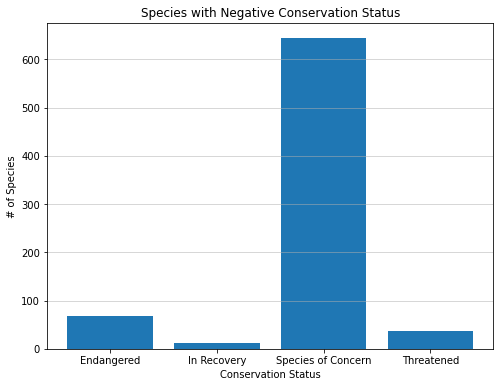

In [304]:
endangered_types = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']

plt.figure(figsize=(8,6))
plt.bar(x=endangered_types, height=endangered)
plt.grid(axis='y', linewidth=0.5)
plt.xlabel('Conservation Status')
plt.ylabel('# of Species')
plt.title('Species with Negative Conservation Status')
plt.show()

In [312]:
#List comprehension to get xtick labels to match data
categories = [category for category, df in observation_df.groupby(['category'])]
non_na = observation_df.groupby(['category']).count()
non_na['Proportion'] = non_na.conservation_status / non_na.scientific_name
non_na.head(25)


,scientific_name,park_name,observations,common_names,conservation_status,Proportion
category,,,,,,
Amphibian,320,320,320,320,28,0.087500
Bird,2083,2083,2083,2083,316,0.151704
Fish,508,508,508,508,40,0.078740
Mammal,855,855,855,855,152,0.177778
Nonvascular Plant,1332,1332,1332,1332,20,0.015015
Reptile,316,316,316,316,20,0.063291
Vascular Plant,17867,17867,17867,17867,184,0.010298


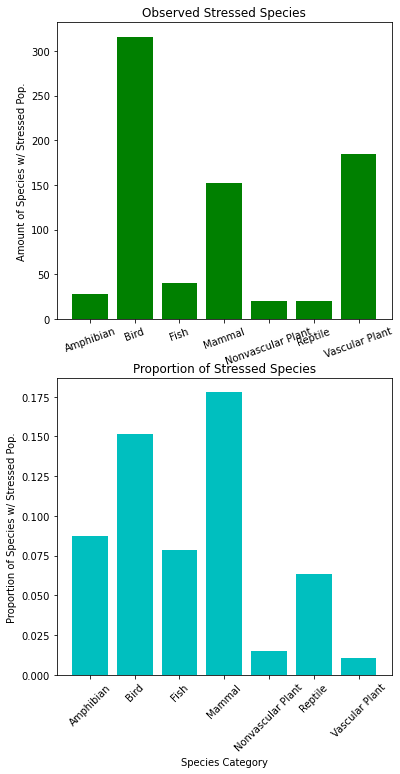

In [325]:
plt.figure(figsize=(6,12))
plt.subplot(2,1,1)
plt.bar(categories, non_na.conservation_status, color='green')
plt.xticks(rotation=20)
#plt.xlabel('Species Category')
plt.ylabel('Amount of Species w/ Stressed Pop.')
plt.title('Observed Stressed Species')
plt.subplot(2,1,2)
plt.bar(categories, non_na.Proportion, color='c')
plt.xticks(rotation=45)
plt.xlabel('Species Category')
plt.ylabel('Proportion of Species w/ Stressed Pop.')
plt.title('Proportion of Stressed Species')
plt.show()



### Question: What were the most and least observed species?

In [291]:
observation_df.sort_values('observations', ascending=False).head(5)


,scientific_name,park_name,observations,category,common_names,conservation_status
12447,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,"Deep-Root Clubmoss, Ground Cedar",NaN
1299,Castilleja miniata,Yellowstone National Park,317,Vascular Plant,"Giant Red Indian Paintbrush, Great Red Indian ...",NaN
9637,Dracocephalum parviflorum,Yellowstone National Park,316,Vascular Plant,American Dragonhead,NaN
22819,Cryptantha fendleri,Yellowstone National Park,316,Vascular Plant,"Fendler's Cryptantha, Sanddune Catseye, Sanddu...",NaN
7822,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,"Stick-Tight, Three-Lobe Beggar-Ticks",NaN


In [292]:
observation_df.sort_values('observations', ascending=True).head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status
10368,Corydalis aurea,Bryce National Park,9,Vascular Plant,"Golden Corydalis, Scrambled Eggs",NaN
17093,Collomia tinctoria,Great Smoky Mountains National Park,10,Vascular Plant,"Staining Collomia, Yellowstain Collomia",NaN
20710,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered
17681,Strix occidentalis,Great Smoky Mountains National Park,11,Bird,Spotted Owl,NaN
22431,Sambucus mexicana,Great Smoky Mountains National Park,12,Vascular Plant,Mexican Elder,NaN


### Question: Were stressed species popuations less observed during the study?

In [293]:
sightings_df = observation_df.dropna()
sightings = sightings_df.groupby(['category']).mean()
sightings



,observations
category,
Amphibian,98.285714
Bird,122.177215
Fish,84.900000
Mammal,108.217105
Nonvascular Plant,135.250000
Reptile,126.800000
Vascular Plant,124.179348


In [294]:
sightings_na_df = observation_df[observation_df['conservation_status'].isnull()]
sightings_na = sightings_na_df.groupby(['category']).mean()
sightings_na

,observations
category,
Amphibian,141.160959
Bird,143.729485
Fish,144.064103
Mammal,142.234708
Nonvascular Plant,143.253049
Reptile,142.371622
Vascular Plant,143.100266


In [295]:
all_sightings = sightings.merge(sightings_na, on='category')
#all_sightings = all_sightings.transpose()
all_sightings.head()

,observations_x,observations_y
category,,
Amphibian,98.285714,141.160959
Bird,122.177215,143.729485
Fish,84.900000,144.064103
Mammal,108.217105,142.234708
Nonvascular Plant,135.250000,143.253049


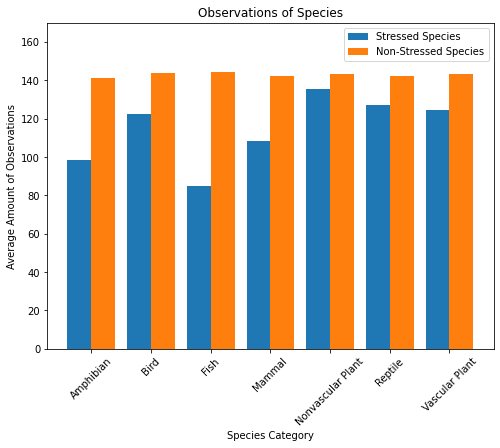

In [331]:
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

observ_a_x = create_x(2,0.8,1,7)
observ_b_x = create_x(2,0.8,2,7)

plt.figure(figsize=[8,6])
ax=plt.subplot()
plt.bar(x=observ_a_x, height=all_sightings.observations_x)
plt.bar(x=observ_b_x, height=all_sightings.observations_y)
middle_x = [(observ_a_x[i]+observ_b_x[i])/2 for i in range(len(observ_a_x))]
ax.set_xticks(middle_x)
ax.set_xticklabels(categories)
plt.legend(['Stressed Species', 'Non-Stressed Species'])
plt.xlabel('Species Category')
plt.xticks(rotation=45)
plt.ylabel('Average Amount of Observations')
plt.ylim(top=170)
plt.title('Observations of Species')
plt.show()